## Esercizo 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati0.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``  from scipy.io import loadmat
    import numpy as np
    dati = loadmat('Dati0.mat')
    A=dati["A"]
    b=dati["b"] ``

In [15]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import RisolviSis

In [16]:
def gauss_seidel(A, b, x0, toll, itmax):
    # La dichiaro per buona norma anche se Python ha scope di lettura che va anche al di fuori
    # dell'ambito della funzione
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, - 1)
    F = np.triu(A, 1)

    # Devo introdurre un parametro omega che riduca il più possibile il raggio spettrale
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale:    ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. Tengo traccia del vettore
    # degli errori per poi fare un grafico rappresentativo
    it = 0
    err_vet = []
    err = 1000

    # Imposto le condizioni di convergenza ad itmax iterate e alla quantità di errore maggiore
    # rispetto ad una determinata tolleranza. Moltiplicare per una matrice diagonale significa
    # dividere una matrice per la diagonale stessa
    while it <= itmax and err >= toll:
        temp = b - np.dot(F, x0)
        x, flag = RisolviSis.Lsolve(M, temp)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet

(400, 400)
Raggio spettrale:     0.9777864028930768
Soluzione GS:     [[0.99545915]
 [0.99111319]
 [0.98705171]
 [0.98335678]
 [0.98010145]
 [0.97734839]
 [0.97514863]
 [0.97354065]
 [0.97254961]
 [0.97218679]
 [0.97244949]
 [0.97332101]
 [0.97477119]
 [0.97675706]
 [0.97922402]
 [0.98210715]
 [0.98533291]
 [0.98882103]
 [0.99248658]
 [0.99624214]
 [0.99111319]
 [0.9826081 ]
 [0.9746601 ]
 [0.96742985]
 [0.96106032]
 [0.95567407]
 [0.95137095]
 [0.94822613]
 [0.94628869]
 [0.9455806 ]
 [0.94609637]
 [0.94780323]
 [0.95064199]
 [0.95452852]
 [0.95935585]
 [0.96499696]
 [0.97130797]
 [0.97813186]
 [0.98530255]
 [0.99264909]
 [0.98705171]
 [0.9746601 ]
 [0.96308077]
 [0.95254783]
 [0.94326956]
 [0.93542446]
 [0.92915786]
 [0.92457913]
 [0.92175955]
 [0.92073092]
 [0.921485  ]
 [0.92397382]
 [0.92811096]
 [0.93377369]
 [0.94080611]
 [0.94902313]
 [0.95821516]
 [0.96815358]
 [0.97859655]
 [0.98929523]
 [0.98335678]
 [0.96742985]
 [0.95254783]
 [0.93901165]
 [0.92708897]
 [0.91700909]
 [0.90

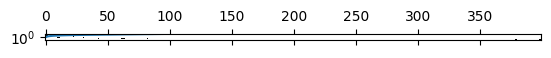

In [17]:
dati = loadmat('Dati0.mat')
A=dati["A"]
b=dati["b"]

# Vedo la forma di A
print(A.shape)

# Costruisce una immagine mettendo stelline su elementi che sono diversi da 0
plt.spy(A)

# Voglio fare una indagine su questa matrice cercando di comprenderne le caratteristiche:
# uso il criterio di Sylvester (analisi del determinante delle sottomatrici) oppure controllo
# la positività degli autovalori della matrice.
#
# La matrice è simmetrica, i suoi autovalori sono tutti positivi e quindi procedo risolvendo
# Steepest Descent o Gauss Siedel:
n = A.shape[0]
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()



## Esercizio 2

La sequenza 

$$x_1=1$$
$$x_n= 2^{n-1} \left( \sqrt{1+ \frac{x_{n-1}}{2^{n-2}} }-1 \right)    \quad \quad n=2,3,...,\quad (1) $$

converge a $log(2)$, cioè  $\lim_{n \rightarrow \infty} x_n= log(2)$

- Si calcolino i valori della sequenza (1) per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di $n=1,..,71$  e nelle ordinate il corrispondente valore di $x_n$ . 

- La successione converge a log(2)? In corrispondenza di quale $n$ si verifica un pessimo risultato? Spiegare alla luce della teoria

- Manipolando opportunamente la formula (1) scrivere una formula  equivalente  ma piu\' stabile per ottenere la sequenza $\tilde x_n$
algebricamente equivalente alla (1).

- Valutare la formula proposta per calcolare la sequenza $\tilde x_n $ per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di n  e nelle ordinate il corrispondente valore di $\tilde x_n$ 

- Calcolare l'errore relativo di ogni $x_n$ rispetto al valore esatto $log(2)$ 


- Calcolare l'errore relativo di ogni $\tilde x_n$ rispetto al valore esatto $log(2)$

## Esercizo 3
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati1.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 
